In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
os.chdir('drive/My Drive/project_path')

# Prepare json files

In [ ]:
# import codecs
# import numpy as np
# from numpy import linalg as LA

In [ ]:
# hsr_whole_normalize_vectors.txt dictionary json 파일로 만들기
import json

file_name = "./word list/hsr_whole_normalize_vectors.txt"
save_name = "./word list/hsr_whole.json"
dict_hsr = {}
with open(file_name, "r") as fp:
    line = fp.readline()
    while True:
        if not line: break
        temp = line.split()
        if len(temp) == 769:
            dict_hsr[temp[0]] = [float(i) for i in temp[1:]]
        line = fp.readline()
print(len(dict_hsr.keys()))

with open(save_name,'w') as f:
    json.dump(dict_hsr, f)

1033


In [ ]:
# hsr_klue_bert_vectors_normalize.txt dictionary json 파일로 만들기
file_name = "./word list/hsr_klue_bert_vectors_normalize.txt"
save_name = "./word list/hsr_klue.json"
dict_hsr = {}
with open(file_name, "r") as fp:
    line = fp.readline()
    while True:
        if not line: break
        temp = line.split()
        if len(temp) == 769:
            dict_hsr[temp[0]] = [float(i) for i in temp[1:]]
        line = fp.readline()
print(len(dict_hsr.keys()))
with open(save_name,'w') as f:
    json.dump(dict_hsr, f)

32000


In [ ]:
# klue_bert_vectors_normalize.txt dictionary json 파일로 만들기
file_name = "./word list/klue_bert_vectors_normalize.txt"
save_name = "./word list/klue.json"
dict_klue = {}
with open(file_name, "r") as fp:
    line = fp.readline()
    while True:
        if not line: break
        temp = line.split()
        if len(temp) == 769:
            dict_klue[temp[0]] = [float(i) for i in temp[1:]]
        line = fp.readline()
print(len(dict_klue.keys()))
with open(save_name,'w') as f:
    json.dump(dict_klue, f)

32000


In [ ]:
!pip install transformers

In [ ]:
import torch
from transformers import AutoModel, AutoTokenizer
import logging
import matplotlib.pyplot as plt
from os import path
from google.colab import drive

In [ ]:
def get_bert_input(text, tokenizer):
  # text = "프로그래머"
  marked_text = "[CLS]" + text + "[SEP]"
  tokenized_text = tokenizer.tokenize(marked_text)
  indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
  # print(tokenized_text)
  # print(indexed_text)
  segments_ids = [1]
  tokens_tensor = torch.tensor([indexed_tokens])
  segments_tensor = torch.tensor([segments_ids])
  return tokens_tensor, segments_tensor

In [ ]:
def get_word_emb(text, tokenizer, model):
  tokens_tensor, segments_tensor = get_bert_input(text, tokenizer)
  model.eval()
  with torch.no_grad():
    outputs = model(tokens_tensor, segments_tensor)
  hidden_states = outputs[2]
  token_vecs = hidden_states[-2][0] # second to last layer representation. (num_tokens, 768)
  # Calculate the average of all 22 token vectors.
  sentence_embedding = torch.mean(token_vecs, dim=0)
  return sentence_embedding

In [ ]:
model = AutoModel.from_pretrained("klue/bert-base", output_hidden_states = True)
tokenizer = AutoTokenizer.from_pretrained("klue/bert-base")

Downloading:   0%|          | 0.00/425 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/424M [00:00<?, ?B/s]

Some weights of the model checkpoint at klue/bert-base were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/289 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/243k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [ ]:
gn_dict = {}
import csv
f = open('./word list/gender_neutral.csv')
rdr = csv.reader(f)
for line in rdr:
  gn_dict[line[0]] = get_word_emb(line[0], tokenizer, model).tolist()
  # print(line[0])
f.close()

In [ ]:
import json
with open('./neutral.json','w') as f:
    json.dump(gn_dict,f)

# Data load

In [ ]:
import numpy as np
from numpy import linalg as LA
import json
 
professions_f = open('./word list/professions.json')
male_f = open('./word list/male.json')
female_f = open('./word list/female.json')
neutral_f = open('./word list/neutral.json')
klue_f = open('./word list/klue.json')
hsr_whole_f = open('./word list/hsr_whole.json')
hsr_klue_f = open('./word list/hsr_klue.json')
 
# returns JSON object as
# a dictionary
professions = json.load(professions_f)
male = json.load(male_f)
female = json.load(female_f)
neutral = json.load(neutral_f)
old_klue = json.load(klue_f)
old_hsr_whole = json.load(hsr_whole_f)
old_hsr_klue = json.load(hsr_klue_f)

total = {}
total.update(professions)
total.update(neutral)

# delete gender definition words from hsr_whole and hsr_klue
gender_definition = list(male.keys()) + list(female.keys())
hsr_whole = {}
keys = list(old_hsr_whole.keys())
for word in keys:
    if word in gender_definition:
        continue
    else:
        hsr_whole[word] = old_hsr_whole[word]
hsr_klue = {}
keys = list(old_hsr_klue.keys())
for word in keys:
    if word in gender_definition:
        continue
    else:
        hsr_klue[word] = old_hsr_klue[word]
klue = {}
keys = list(old_klue.keys())
for word in keys:
    if word in gender_definition:
        continue
    else:
        klue[word] = old_klue[word]

def normalize(emb):
  emb_keys = list(emb.keys())
  emb_vals = np.array(list(emb.values()))
  norms = np.apply_along_axis(LA.norm, 1, emb_vals)
  emb_vals = emb_vals / norms[:, np.newaxis]
  emb_norm = {}
  for i in range(len(emb_keys)):
    emb_norm[emb_keys[i]] = emb_vals[i]
  return emb_norm

professions = normalize(professions)
male = normalize(male)
female = normalize(female)
neutral = normalize(neutral)
total = normalize(total)
klue = normalize(klue)
hsr_whole = normalize(hsr_whole)
hsr_klue = normalize(hsr_klue)


# Bias-by-projection

In [ ]:
# Get top 200 male- and female-biased words
def topKdict(space, male, female, k=200):
    
    # extract the word vector for word w
    gender_direction = male['남성'] - female['여성']
    sim = []
    # compute similarity of w with all words in the vocabulary
    dict_keys = list(space.keys())
    for word in dict_keys:
        sim.append(space[word].dot(gender_direction))
    # sort similarities by descending order
    sim_arr = np.array(sim)
    sort_sim = (sim_arr.argsort())[::-1]

    # choose topK
    best = sort_sim[:k]

    sort_sim = (sim_arr.argsort())
    best = np.concatenate((best, sort_sim[:k]), axis=0)

    extracted_dict = {}
    for i in best:
        extracted_dict[dict_keys[i]] = space[dict_keys[i]]


    print(len(extracted_dict.keys()))
    return extracted_dict

top200 = topKdict(total, male, female, 200)
top100 = topKdict(total, male, female, 100)
top10 = topKdict(total, male, female, 10)

top320_klue = topKdict(klue, male, female, 320)

top320_hsr_klue = topKdict(hsr_klue, male, female, 320)

top200_hsr = topKdict(hsr_whole, male, female, 200)
top100_hsr = topKdict(hsr_whole, male, female, 100)
top10_hsr = topKdict(hsr_whole, male, female, 10)

400
200
20
640
640
400
200
20


In [ ]:
def compute_bias_by_projection(male_key, female_key, professions, male, female):
  males = np.array(list(professions.values())).dot(np.array(male[male_key]))
  females = np.array(list(professions.values())).dot(np.array(female[female_key]))
  professions_keys = list(professions.keys())
  professions_bias = {}
  for w, m, f in zip(professions_keys, males, females):
    professions_bias[w] = m - f
  return professions_bias

professions_bias = compute_bias_by_projection('남성', '여성', professions, male, female)
neutral_bias = compute_bias_by_projection('남성', '여성', neutral, male, female)
male_bias = compute_bias_by_projection('남성', '여성', male, male, female)
female_bias = compute_bias_by_projection('남성', '여성', female, male, female)
total_bias = compute_bias_by_projection('남성', '여성', total, male, female)
hsr_bias = compute_bias_by_projection('남성', '여성', hsr_whole, male, female)
klue_bias = compute_bias_by_projection('남성', '여성', klue, male, female)
hsr_klue_bias = compute_bias_by_projection('남성', '여성', hsr_klue, male, female)

top200_bias = compute_bias_by_projection('남성', '여성', top200, male, female)
top100_bias = compute_bias_by_projection('남성', '여성', top100, male, female)
top10_bias = compute_bias_by_projection('남성', '여성', top10, male, female)

top200_hsr_bias = compute_bias_by_projection('남성', '여성', top200_hsr, male, female)
top100_hsr_bias = compute_bias_by_projection('남성', '여성', top100_hsr, male, female)
top10_hsr_bias = compute_bias_by_projection('남성', '여성', top10_hsr, male, female)

top320_klue_bias = compute_bias_by_projection('남성', '여성', top320_klue, male, female)
top320_hsr_klue_bias = compute_bias_by_projection('남성', '여성', top320_hsr_klue, male, female)

In [ ]:
def report_bias(gender_bias):
    bias = 0.0
    for k in gender_bias:
        bias += np.abs(gender_bias[k])
    print(bias/len(gender_bias))
report_bias(professions_bias)
report_bias(neutral_bias)
report_bias(male_bias)
report_bias(female_bias)
report_bias(total_bias)
report_bias(top200_bias)
report_bias(top100_bias)
report_bias(top10_bias)
print("hsr")
report_bias(hsr_bias)
report_bias(top10_hsr_bias)
print("klue")
report_bias(klue_bias)
report_bias(top320_klue_bias)
print("hsr klue")
report_bias(hsr_klue_bias)
report_bias(top320_hsr_klue_bias)

m = 0
f = 0
for w in list(professions_bias.keys()):
  if professions_bias[w] > 0:
    m +=1
  else:
    f +=1

print(m, f)

m = 0
f = 0
for w in list(neutral_bias.keys()):
  if neutral_bias[w] > 0:
    m +=1
  else:
    f +=1

print(m ,f)

m = 0
f = 0
for w in list(male_bias.keys()):
  if male_bias[w] > 0:
    m +=1
  else:
    f +=1

print(m, f)

m = 0
f = 0
for w in list(female_bias.keys()):
  if female_bias[w] > 0:
    m +=1
  else:
    f +=1

print(m, f)

m = 0
f = 0
for w in list(total_bias.keys()):
  if total_bias[w] > 0:
    m +=1
  else:
    f +=1

print(m, f)

m = 0
f = 0
for w in list(top200_bias.keys()):
  if top200_bias[w] > 0:
    m +=1
  else:
    f +=1

print(m, f)

m = 0
f = 0
for w in list(top100_bias.keys()):
  if top100_bias[w] > 0:
    m +=1
  else:
    f +=1

print(m, f)

m = 0
f = 0
for w in list(top10_bias.keys()):
  if top10_bias[w] > 0:
    m +=1
  else:
    f +=1

print(m, f)

0.007625269079860657
0.00937065063268814
0.013104506328552807
0.012474842968230437
0.009177898262619041
0.014752660905595138
0.018465736881507572
0.030016163317820012
hsr
0.0034252170337006303
0.011331095567217562
klue
0.00837147740297342
0.02704690251002025
hsr klue
0.003742259026676998
0.011686731870598271
40 69
275 603
27 4
8 25
315 672
200 200
100 100
10 10


# Correlation

In [ ]:
from tqdm import tqdm

def topK(w, space, k=10):
    
    # extract the word vector for word w
    vec = space[w]
    sim = []
    # compute similarity of w with all words in the vocabulary
    dict_keys = list(space.keys())
    for word in dict_keys:
        sim.append(space[word].dot(vec))
    # sort similarities by descending order
    sim_arr = np.array(sim)
    sort_sim = (sim_arr.argsort())[::-1]

    # choose topK
    best = sort_sim[:(k+1)]

    return [dict_keys[i] for i in best if dict_keys[i]!=w]

def bias_by_neighbors(space, space_bias, neighbours_num = 5):
    
    tuples = []
    for w in tqdm(space.keys()):

        top = topK(w, space, k=neighbours_num+5)[:neighbours_num]

        m = 0
        f = 0    
        for t in top:
            if space_bias[t] > 0:
                m+=1
            else:
                f+=1
            
        tuples.append((w, space_bias[w], m, f))

    return tuples

total_neigh5 = bias_by_neighbors(total, total_bias, 5)
total_neigh10 = bias_by_neighbors(total, total_bias, 10) 
total_neigh20 = bias_by_neighbors(total, total_bias, 20)
total_neigh40 = bias_by_neighbors(total, total_bias, 40) 
total_neigh60 = bias_by_neighbors(total, total_bias, 60) 
total_neigh80 = bias_by_neighbors(total, total_bias, 80) 
total_neigh100 = bias_by_neighbors(total, total_bias, 100) 

total_neigh20_hsr = bias_by_neighbors(hsr_whole, hsr_bias, 20)
total_neigh640_klue = bias_by_neighbors(klue, klue_bias, 640)
total_neigh640_hsr_klue = bias_by_neighbors(hsr_klue, hsr_klue_bias, 640)

100%|██████████| 31953/31953 [27:22<00:00, 19.45it/s]


In [ ]:
# compute correlation between bias-by-projection and bias-by-neighbors

import scipy.stats

def pearson(a,b):
   
    return scipy.stats.pearsonr(a,b)

def compute_corr(tuples, i1, i2):
    
    a = []
    b = []
    for t in tuples:
        a.append(t[i1])
        b.append(t[i2])
    assert(len(a)==len(b))    
    print(pearson(a,b))

# compute_corr(professions_neigh, 1, 2)
# compute_corr(neutral_neigh, 1, 2)
# compute_corr(male_neigh, 1, 2) # 사실상 의미 없음
# compute_corr(female_neigh, 1, 2) # 사실상 의미 없음
compute_corr(total_neigh5, 1, 2)
compute_corr(total_neigh10, 1, 2)
compute_corr(total_neigh20, 1, 2)
compute_corr(total_neigh40, 1, 2)
compute_corr(total_neigh60, 1, 2)
compute_corr(total_neigh80, 1, 2)
compute_corr(total_neigh100, 1, 2)
print("---")
compute_corr(total_neigh20_hsr, 1, 2)
compute_corr(total_neigh640_klue, 1, 2)
compute_corr(total_neigh640_hsr_klue, 1, 2)

(0.6172784510805122, 1.0239262049629107e-104)
(0.6458520052036073, 1.3814439808758645e-117)
(0.6542107022793078, 1.2866994053135747e-121)
(0.657324381501593, 3.757833031652432e-123)
(0.6496761561175758, 2.0511564874545176e-119)
(0.637976387409103, 6.669629400879593e-114)
(0.6409141964708017, 2.9013899204410247e-115)
---
(0.6011604080526419, 2.8809951202708943e-96)
(0.690846439015825, 0.0)
(0.6948275901439995, 0.0)


# Clustering

In [ ]:
!pip install mpld3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 201 kB 27.6 MB/s 


In [ ]:
# Auxiliary finctions
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
import mpld3
from cycler import cycler
%matplotlib inline
mpld3.enable_notebook()
mpl.rc("savefig", dpi=200)
mpl.rcParams['figure.figsize'] = (8,8)
mpl.rcParams['axes.prop_cycle'] = cycler(color='rc')

from sklearn.cluster import KMeans
#from sklearn.datasets import make_blobs

from sklearn.manifold import TSNE

def visualize(vectors, words, labels, random_state, num_clusters = 2):
    
    # perform TSNE
    
    X_embedded = TSNE(n_components=2, random_state=random_state).fit_transform(vectors)
    if num_clusters == 2:
        for x,l in zip(X_embedded, labels):
            if l:
                plt.scatter(x[0], x[1], marker = '.', c = 'c')
            else:
                plt.scatter(x[0], x[1], marker = 'x', c = 'darkviolet')
    else:
        plt.scatter(X_embedded[:,0], X_embedded[:,1], c = labels)                

    
def extract_vectors(words, space):
    
    size = len(words)/2
    X = [space[x] for x in words]

    return X


def cluster_and_visualize(words, X, random_state, y_true, num=2):
    fig = plt.figure(figsize=(7,3))
    y_pred = KMeans(n_clusters=num, random_state=random_state).fit_predict(X)
    visualize(X, words, y_pred, random_state)
    correct = [1 if item1 == item2 else 0 for (item1,item2) in zip(y_true, y_pred) ]
    precision = sum(correct)/float(len(correct))
    print('precision: ', max(precision, 1-precision))
    # return max(precision, 1-precision)
    fig.show()

    fig2 = plt.figure(figsize=(7,3))
    X_embedded = TSNE(n_components=2, random_state=random_state).fit_transform(X)
    for x,l in zip(X_embedded, y_true):
        if l:
            plt.scatter(x[0], x[1], marker = '.', c = 'c')
        else:
            plt.scatter(x[0], x[1], marker = 'x', c = 'darkviolet')
    fig2.show()
    # fig.savefig('clustering', bbox_inches='tight')


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


precision:  0.6421875


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


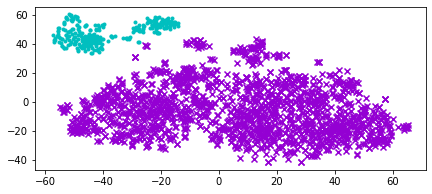

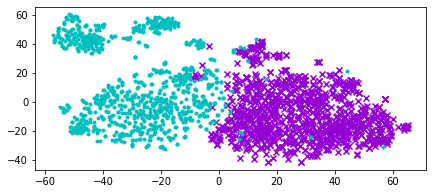

In [ ]:
# Cluster most biased words before and after debiasing
import operator
import random
random.seed(1)
random_state = 1
size =960

def get_params(space, space_bias, size=5):
    dict_items = list(space_bias.items())
    sorted_g = sorted(dict_items, key=operator.itemgetter(1))
    female_list = [item[0] for item in sorted_g[:size]]
    male_list = [item[0] for item in sorted_g[-size:]]
    X = extract_vectors(male_list + female_list, space)
    return male_list, female_list, X


# male, female, X = get_params(professions, professions_bias, size)
# y_true = [0]*size + [1]*size
# cluster_and_visualize(male + female, X, random_state, y_true)

# male, female, X = get_params(neutral, neutral_bias, size)
# y_true = [0]*size + [1]*size
# cluster_and_visualize(male + female, X, random_state, y_true)

# sizes = [i for i in range(1, 401)]
# precisions = []
# for size in range(1, 401):
#     male_list, female_list, X = get_params(total, total_bias, size)
#     y_true = [0]*size + [1]*size
#     # print(size)
#     precision = cluster_and_visualize(male_list + female_list, X, random_state, y_true)
#     precisions.append(precision)

# plt.plot(sizes, precisions)
# plt.show()

male_list, female_list, X = get_params(hsr_klue, hsr_klue_bias, size)
y_true = [0]*size + [1]*size
precision = cluster_and_visualize(male_list + female_list, X, random_state, y_true)

# male, female, X = get_params(professions, professions_bias, size)
# y_true = [0]*size + [1]*size
# cluster_and_visualize(male + female, X, random_state, y_true)

# Profession

In [ ]:
import scipy.stats

tuples = []
for w in list(professions_bias.keys()):
  sim = np.array(list(hsr_klue.values())).dot(professions[w])
  sort_sim = (sim.argsort())[::-1]
  m = 0
  f = 0
  for i in range(960):
    # print(list(professions.keys())[sort_sim[i]])
    if hsr_klue_bias[list(hsr_klue.keys())[sort_sim[i]]] > 0:
      m+=1
    else:
      f+=1
  
  tuples.append((w, professions_bias[w], m, f))

print(tuples)

[('회계사', 0.005267210961263258, 562, 398), ('천문학자', -0.006825351301229188, 392, 568), ('교사', -0.01500909788051541, 618, 342), ('소방관', -0.0036447996628475865, 420, 540), ('농부', -0.006390186149781707, 405, 555), ('전사', -0.001744392475548917, 539, 421), ('건설 노동자', -0.03294445537960644, 192, 768), ('철학자', -0.004446591517797915, 388, 572), ('조사관', 0.007789815497716179, 493, 467), ('웨이터', -0.010657133721921896, 313, 647), ('심장병 전문의', -0.01805104908395949, 368, 592), ('권투 선수', -0.01997018652810789, 285, 675), ('지휘자', 0.000757719187283401, 420, 540), ('경리', 0.007252976014433088, 484, 476), ('유치원', -0.0022372086432284055, 586, 374), ('감사관', -0.004405702712369508, 315, 645), ('드럼연주자', 0.005968936925879853, 50, 910), ('편집자', -0.012025480585825532, 248, 712), ('대통령', -0.014097321885457093, 280, 680), ('과학자', -0.011750892570911553, 467, 493), ('형사', 0.015590962441851874, 514, 446), ('출납원', 0.003986699880604405, 463, 497), ('서기', -0.008210462620810377, 488, 472), ('수령', 0.007948289371301542, 629, 331

In [ ]:
import scipy.stats

def pearson(a,b):
   
    return scipy.stats.pearsonr(a,b)

def compute_corr(tuples, i1, i2):
    
    a = []
    b = []
    for t in tuples:
        a.append(t[i1])
        b.append(t[i2])
    assert(len(a)==len(b))    
    print(pearson(a,b))

In [ ]:
compute_corr(tuples, 1, 2)

(0.31799401712465014, 0.0007528027821449972)


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (23.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

[('회계사', 0.005267210961263258, 562, 398), ('천문학자', -0.006825351301229188, 392, 568), ('교사', -0.01500909788051541, 618, 342), ('소방관', -0.0036447996628475865, 420, 540), ('농부', -0.006390186149781707, 405, 555), ('전사', -0.001744392475548917, 539, 421), ('건설 노동자', -0.03294445537960644, 192, 768), ('철학자', -0.004446591517797915, 388, 572), ('조사관', 0.007789815497716179, 493, 467), ('웨이터', -0.010657133721921896, 313, 647), ('심장병 전문의', -0.01805104908395949, 368, 592), ('권투 선수', -0.01997018652810789, 285, 675), ('지휘자', 0.000757719187283401, 420, 540), ('경리', 0.007252976014433088, 484, 476), ('유치원', -0.0022372086432284055, 586, 374), ('감사관', -0.004405702712369508, 315, 645), ('드럼연주자', 0.005968936925879853, 50, 910), ('편집자', -0.012025480585825532, 248, 712), ('대통령', -0.014097321885457093, 280, 680), ('과학자', -0.011750892570911553, 467, 493), ('형사', 0.015590962441851874, 514, 446), ('출납원', 0.003986699880604405, 463, 497), ('서기', -0.008210462620810377, 488, 472), ('수령', 0.007948289371301542, 629, 331

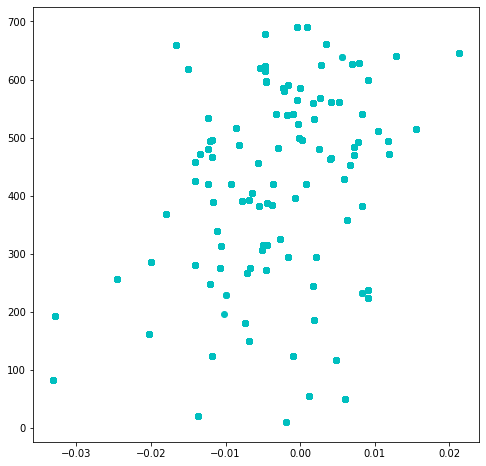

In [ ]:
import matplotlib.pyplot as plt

def show_plots(tuples_bef_prof):
    from matplotlib import font_manager, rc
    plt.rc('font', family='NanumBarunGothic')
    # fig, axs = plt.subplots(2,1, figsize=(8,8))
    print(tuples_bef_prof)
    X = []
    Y = []
    for t in tuples:
      X.append(t[1])
      Y.append(t[2])
      plt.scatter(X,Y, color='c')
    #   plt.annotate(t[0], xy=(t[1], t[2]), xytext=(t[1], t[2]), textcoords="data", fontsize=12)
    
    plt.show()
    # fig.savefig('HSR_profession', bbox_inches='tight')


show_plots(tuples)

# Classification

In [ ]:
from sklearn import svm
from random import shuffle
import random
random.seed(10)

def train_and_predict(space):
  male_v = np.array(male['남성'])
  female_v = np.array(female['여성'])
  sim = np.array(list(space.values())).dot(male_v) - np.array(list(space.values())).dot(female_v)
  # print(sim.shape)
  sort_sim_male = (sim.argsort())[::-1]
  sort_sim_female = (sim.argsort())
  X_train = []
  Y_train = []
  X_test = []
  Y_test = []
  for i in range(400):
    if i%4 != 0:
      X_train.append(space[list(space.keys())[sort_sim_male[i]]])
      Y_train.append(1)
      X_train.append(space[list(space.keys())[sort_sim_female[i]]])
      Y_train.append(0)
    else :
      X_test.append(space[list(space.keys())[sort_sim_male[i]]])
      Y_test.append(1)
      X_test.append(space[list(space.keys())[sort_sim_female[i]]])
      Y_test.append(0)

  X_train = np.vstack(X_train)
  Y_train = np.array(Y_train)
  X_test = np.vstack(X_test)
  Y_test = np.array(Y_test)
  # print(X.shape)

  clf = svm.SVC()
  clf.fit(X_train, Y_train)

  preds = clf.predict(X_test)
  accuracy = [1 if y==z else 0 for y,z in zip(preds, Y_test)]
  print('accuracy:', float(sum(accuracy))/len(accuracy))

train_and_predict(neutral)
train_and_predict(hsr_whole)
train_and_predict(klue)
train_and_predict(hsr_klue)

accuracy: 0.86
accuracy: 0.805
accuracy: 1.0
accuracy: 0.995


# Professions

In [ ]:
!pip install transformers

In [ ]:
import torch
from transformers import AutoModel, AutoTokenizer
import logging
import matplotlib.pyplot as plt
from os import path
from google.colab import drive

def get_bert_input(text, tokenizer):
  # text = "프로그래머"
  marked_text = "[CLS]" + text + "[SEP]"
  tokenized_text = tokenizer.tokenize(marked_text)
  indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
  # print(tokenized_text)
  # print(indexed_text)
  segments_ids = [1]
  tokens_tensor = torch.tensor([indexed_tokens])
  segments_tensor = torch.tensor([segments_ids])
  return tokens_tensor, segments_tensor

def get_word_emb(text, tokenizer, model):
  tokens_tensor, segments_tensor = get_bert_input(text, tokenizer)
  model.eval()
  with torch.no_grad():
    outputs = model(tokens_tensor, segments_tensor)
  hidden_states = outputs[2]
  token_vecs = hidden_states[-2][0] # second to last layer representation. (num_tokens, 768)
  # Calculate the average of all 22 token vectors.
  sentence_embedding = torch.mean(token_vecs, dim=0)
  return sentence_embedding

model = AutoModel.from_pretrained("klue/bert-base", output_hidden_states = True)
tokenizer = AutoTokenizer.from_pretrained("klue/bert-base")

emb1 = get_word_emb("프로그래머", tokenizer, model)

Downloading:   0%|          | 0.00/425 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/424M [00:00<?, ?B/s]

Some weights of the model checkpoint at klue/bert-base were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/289 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/243k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [ ]:
import scipy
import scipy.misc as misc
import itertools
from tqdm import tqdm
import numpy as np

def similarity(w1, w2, space):
  vec1 = np.array(space[w1])
  vec2 = np.array(space[w2])
  vec1 = vec1 / LA.norm(vec1)
  vec2 = vec2 / LA.norm(vec2)
  return np.inner(vec1, vec2)
  
def s_word(w, A, B, all_s_words, space):

  if w in all_s_words:
    return all_s_words[w]

  mean_a = []
  mean_b = []
  for a in A:
    mean_a.append(similarity(w, a, space))
  for b in B:
    mean_b.append(similarity(w, b, space))
  
  mean_a = sum(mean_a)/float(len(mean_a))
  mean_b = sum(mean_b)/float(len(mean_b))

  all_s_words[w] = mean_a - mean_b

  return all_s_words[w]

def s_group(X, Y, A, B, all_s_words, space):

  total = 0
  for x in X:
    total += s_word(x, A, B, all_s_words, space)
  for y in Y:
    total -= s_word(y, A, B, all_s_words, space)
  
  return total

def p_value_exhust(X, Y, A, B, space):
  all_s_words = {}
  s_orig = s_group(X, Y, A, B, all_s_words, space)

  union = set(X+Y)
  subset_size = int(len(union)/2)
  larger = 0
  total = 0

  for subset in tqdm(set(itertools.combinations(union, subset_size))):
    total += 1
    Xi = list(set(subset))
    Yi = list(union - set(subset))
    if s_group(Xi, Yi, A, B, all_s_words, space) > s_orig:
      larger += 1
  # print(larger)
  print('num of samples', total)
  return larger/float(total)

In [ ]:
A = ['지훈', '정훈', '현우', '철수', '시우', '민우', '성호', '재우']
B = ['유진', '지영', '지은', '은영', '수진', '지혜', '서연', '수연']

C = ['경영진', '사장', '전무', '기업', '급여', '사무실', '사업', '직업']
D = ['집', '부모', '아이', '가족', '사촌', '혼인', '결혼식', '친척']

E = ['수학', '산수', '기하학', '미분', '방정식', '계산', '숫자', '도형']
F = ['시', '미술', '춤', '문학', '소설', '교향곡', '연극', '예술']

G = ['과학', '기술', '물리', '화학', '아인슈타인', '항공', '실험', '천문학']
H = ['시', '미술', '셰익스피어', '춤', '문학', '소설', '교향곡', '연극']

print(p_value_exhust(A, B, C, D, klue))
print(p_value_exhust(A, B, E, F, klue))
print(p_value_exhust(A, B, G, H, klue))

100%|██████████| 12870/12870 [00:00<00:00, 74806.01it/s]


num of samples 12870
0.18492618492618493


100%|██████████| 12870/12870 [00:00<00:00, 61101.53it/s]


num of samples 12870
0.07707847707847708


100%|██████████| 12870/12870 [00:00<00:00, 68911.46it/s]

num of samples 12870
0.0038073038073038073


In [ ]:
print(p_value_exhust(A, B, C, D, hsr_klue))
print(p_value_exhust(A, B, E, F, hsr_klue))
print(p_value_exhust(A, B, G, H, hsr_klue))

100%|██████████| 12870/12870 [00:00<00:00, 129786.55it/s]


num of samples 12870
0.03838383838383838


100%|██████████| 12870/12870 [00:00<00:00, 137358.25it/s]


num of samples 12870
0.13815073815073814


100%|██████████| 12870/12870 [00:00<00:00, 124154.34it/s]

num of samples 12870
0.027505827505827505
